In [1]:
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
plt.rcParams["font.size"] = 30
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.titlesize'] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20

In [3]:
BASE_DIR = "."
DEBUG = False

np.random.seed(0)

# Correct Model Complexity (Overfitting vs Underfitting)

We will try to model the original function defined below using polynomial approximations

In [4]:
def orig_fun(X):
    return np.cos(2 * np.pi * X)

In [5]:
n_samples = 20

X = np.sort(np.random.rand(n_samples))
y = orig_fun(X) + np.random.randn(n_samples) * 0.1
# y = orig_fun(X)

In [6]:
def solve(degree):
    fig = plt.figure()
    ax = plt.plot()
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    scores_mean, scores_std = -scores.mean(), scores.std()

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, orig_fun(X_test), linewidth=5, label="Original")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), linewidth=5, label="Model")
    plt.scatter(X, y, edgecolor='b', s=100, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="lower right")
    plt.title("".format(degree))
    if scores_mean < 10:
        mse = "Model with degree={} \n\n MSE = {:.4f} +/- {:.4f}".format(degree, scores_mean, scores_std)
    else:
        mse = "Model with degree={} \n\n MSE = {:.2e}  +/-  {:.2e}".format(degree, scores_mean, scores_std)
    fig.text(1.15, 0.5, mse, ha='center')
    plt.show()

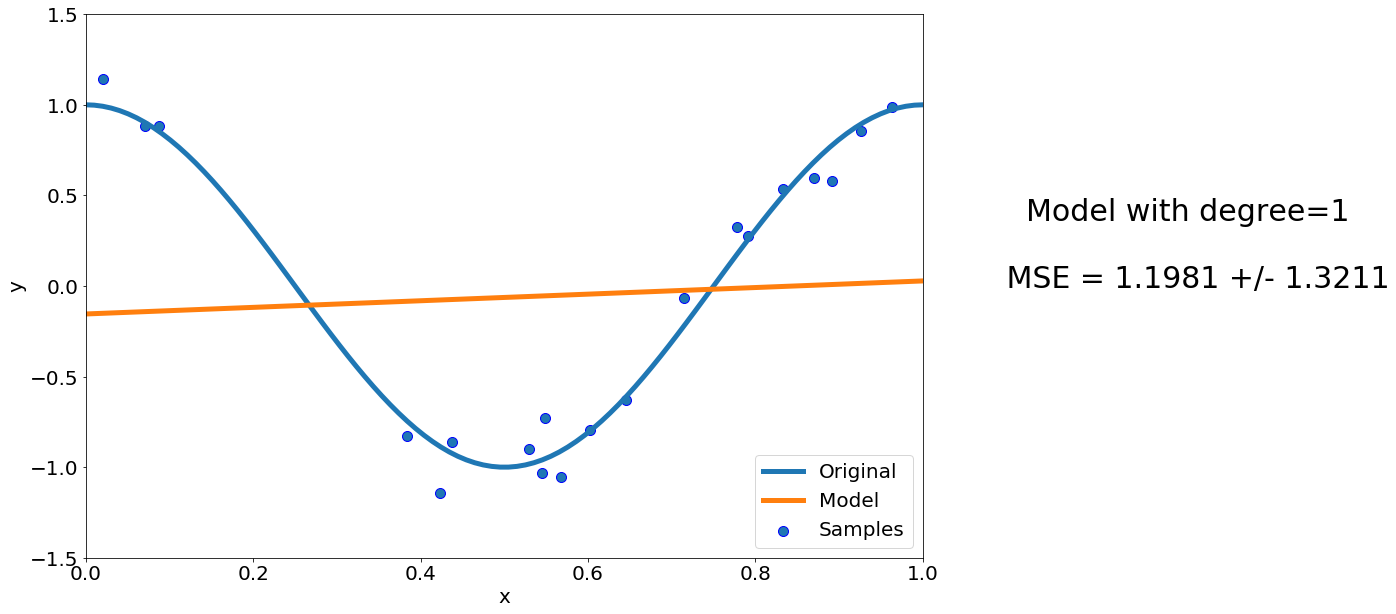

In [7]:
solve(1)

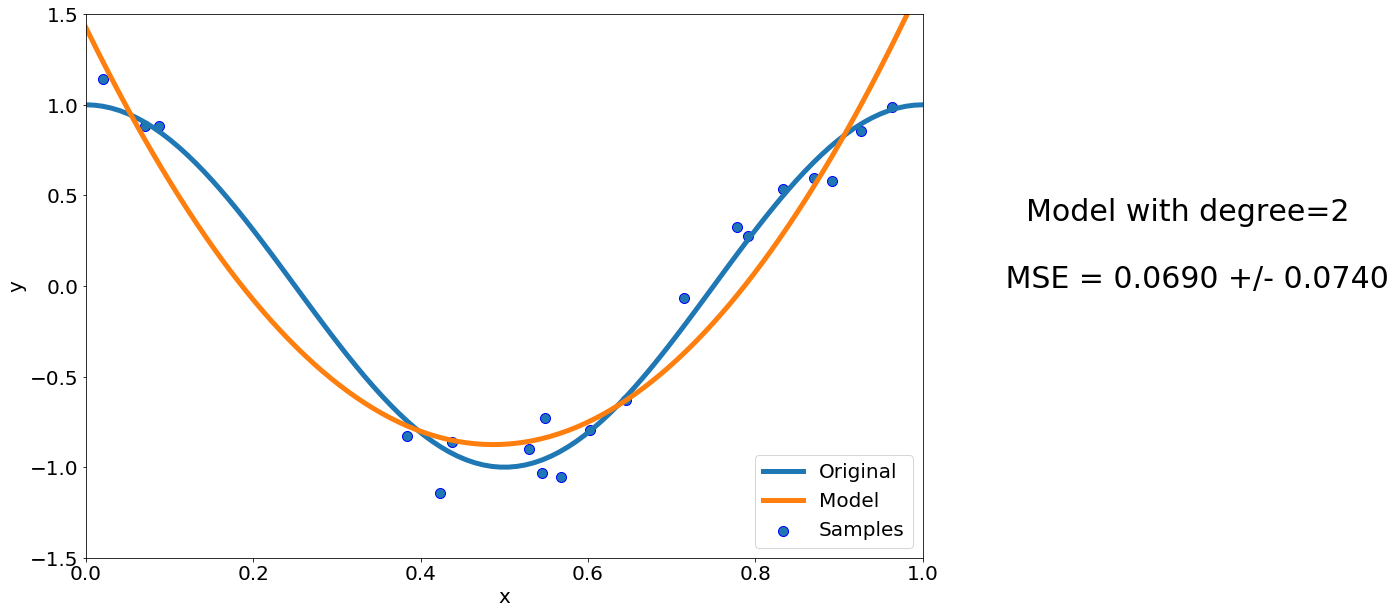

In [8]:
solve(2)



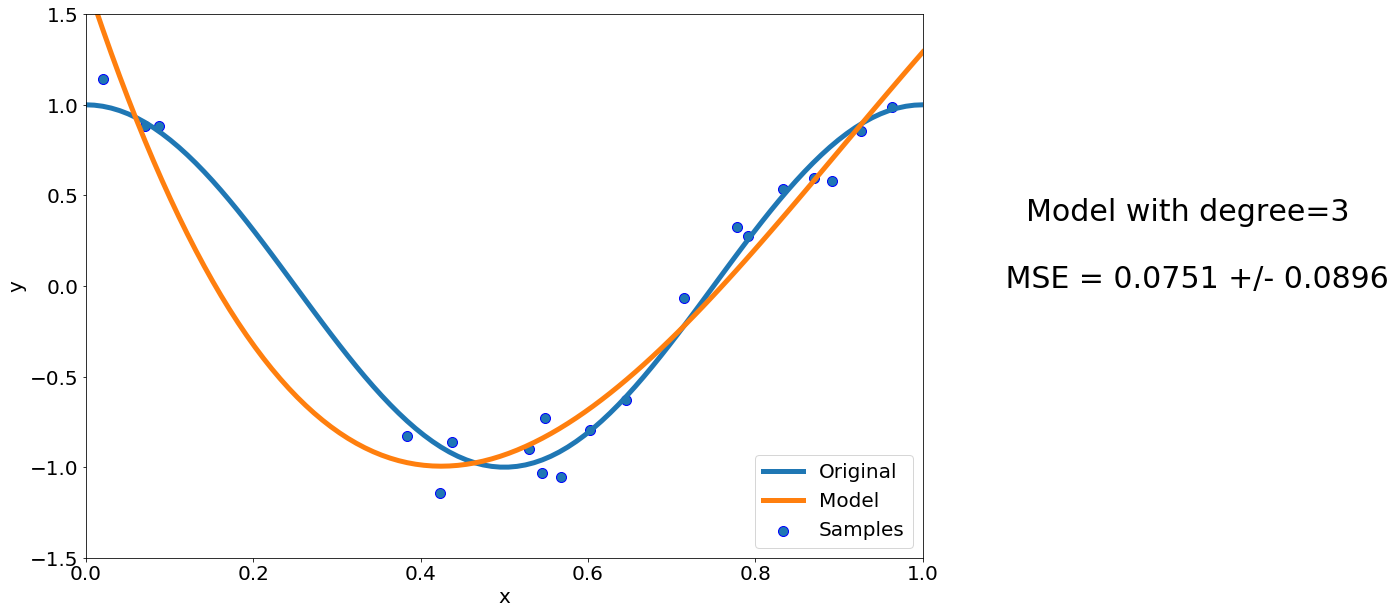

In [9]:
solve(3)

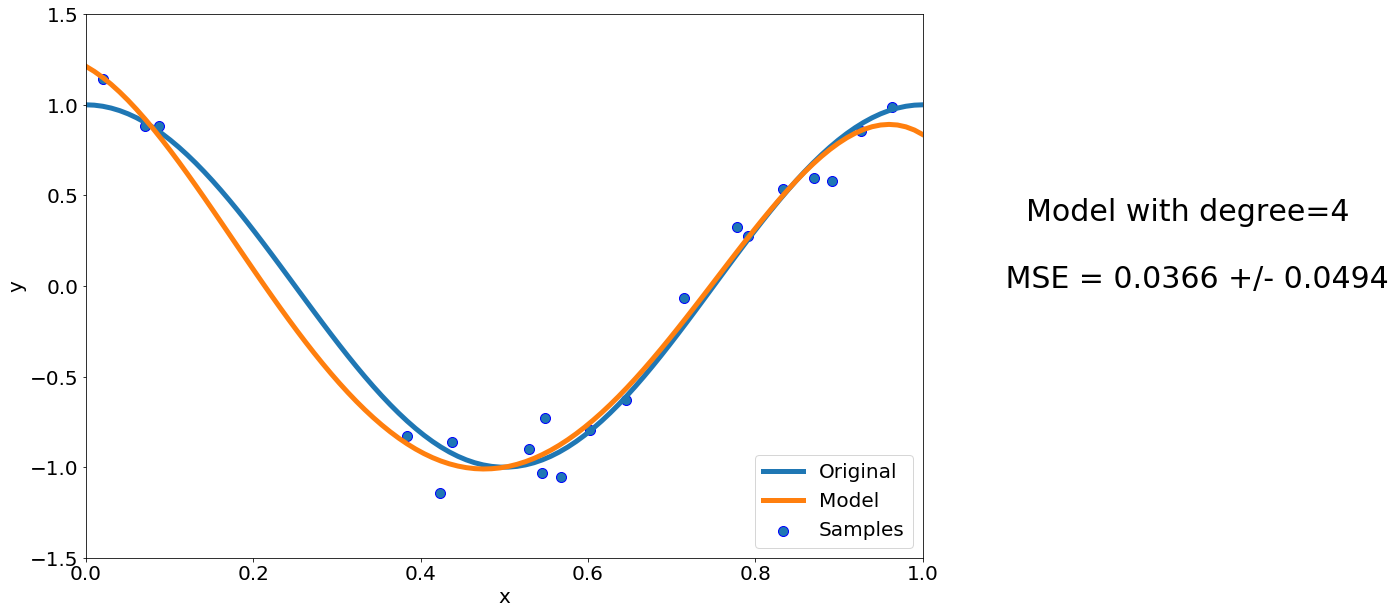

In [10]:
solve(4)

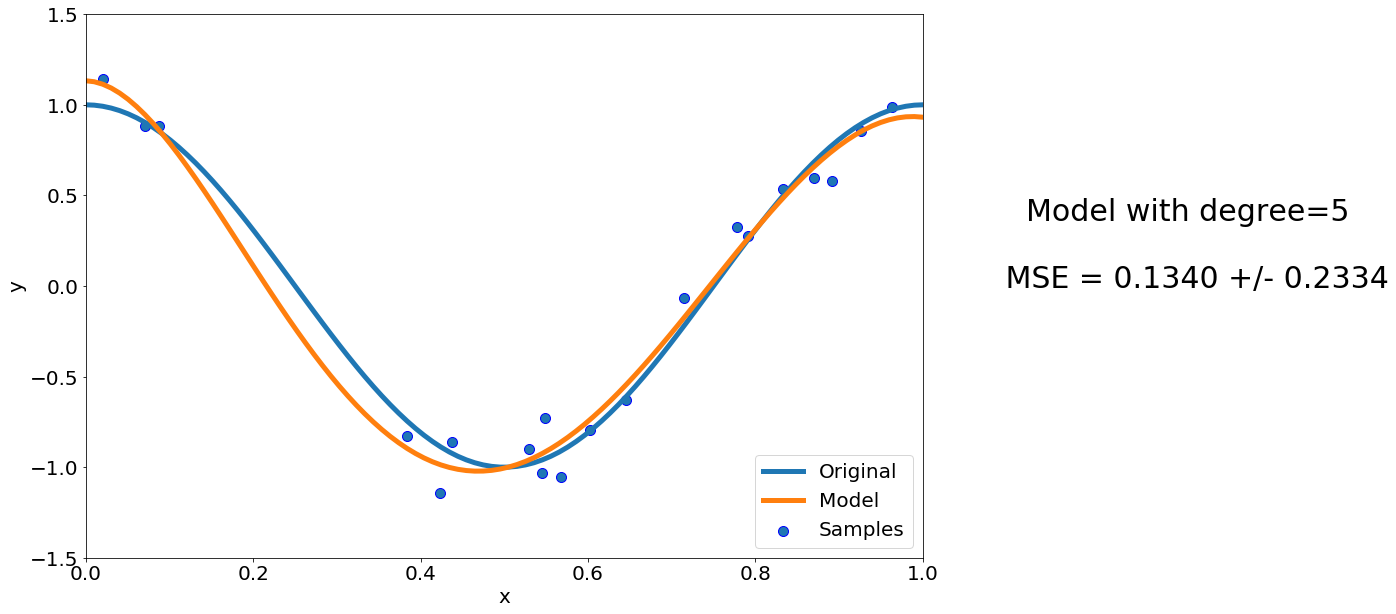

In [11]:
solve(5)

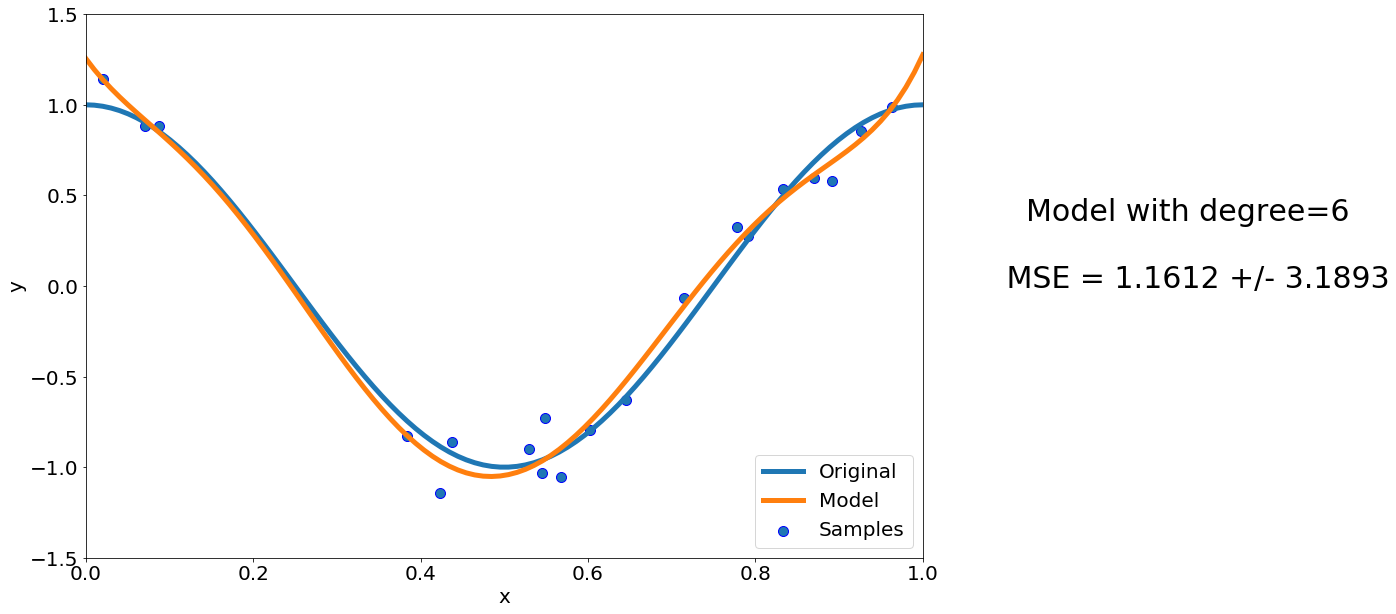

In [12]:
solve(6)

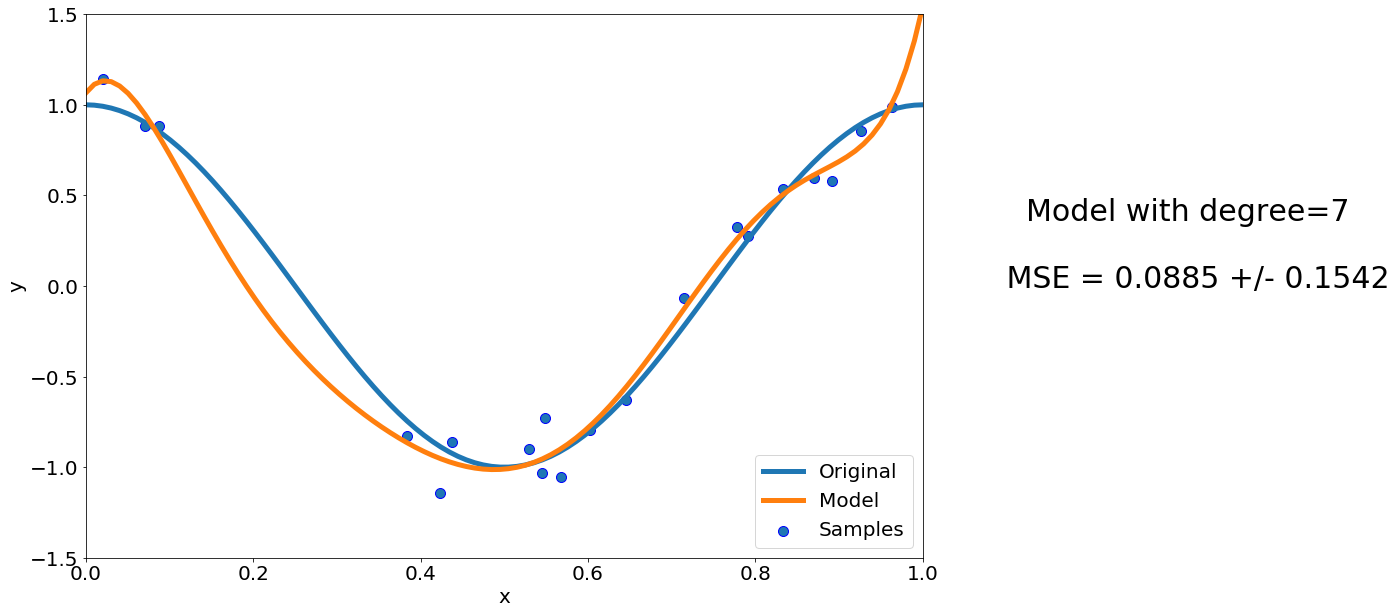

In [13]:
solve(7)

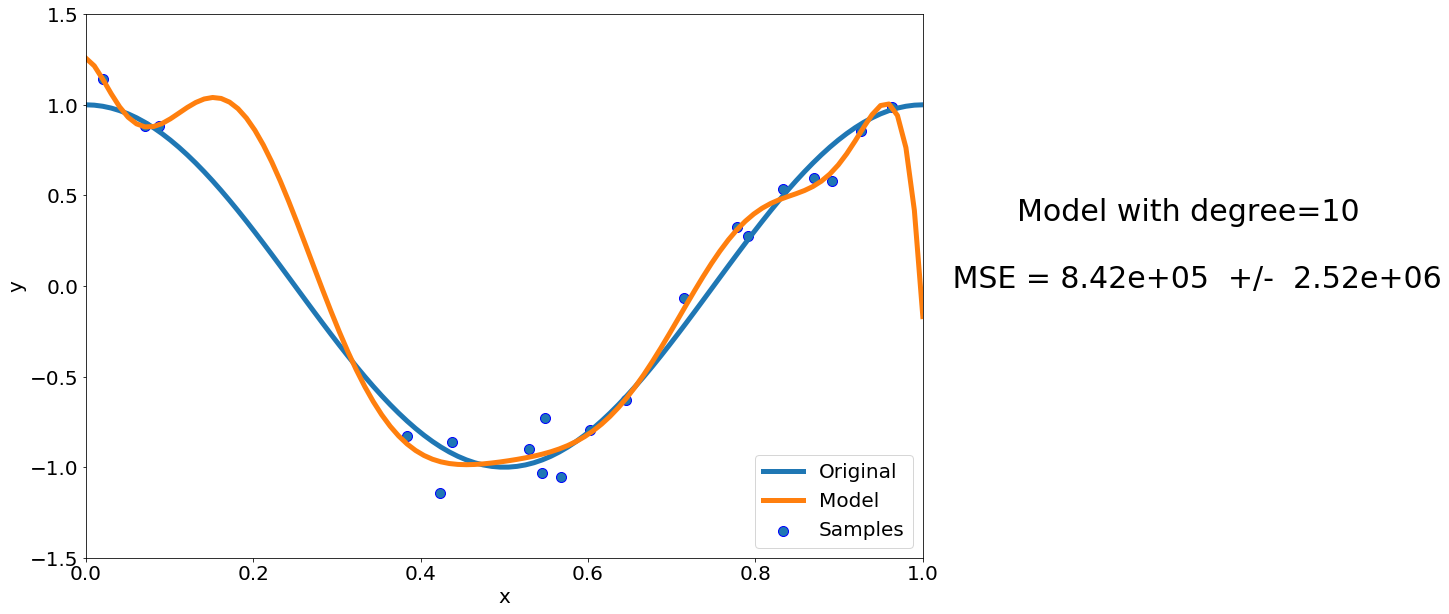

In [14]:
solve(10)

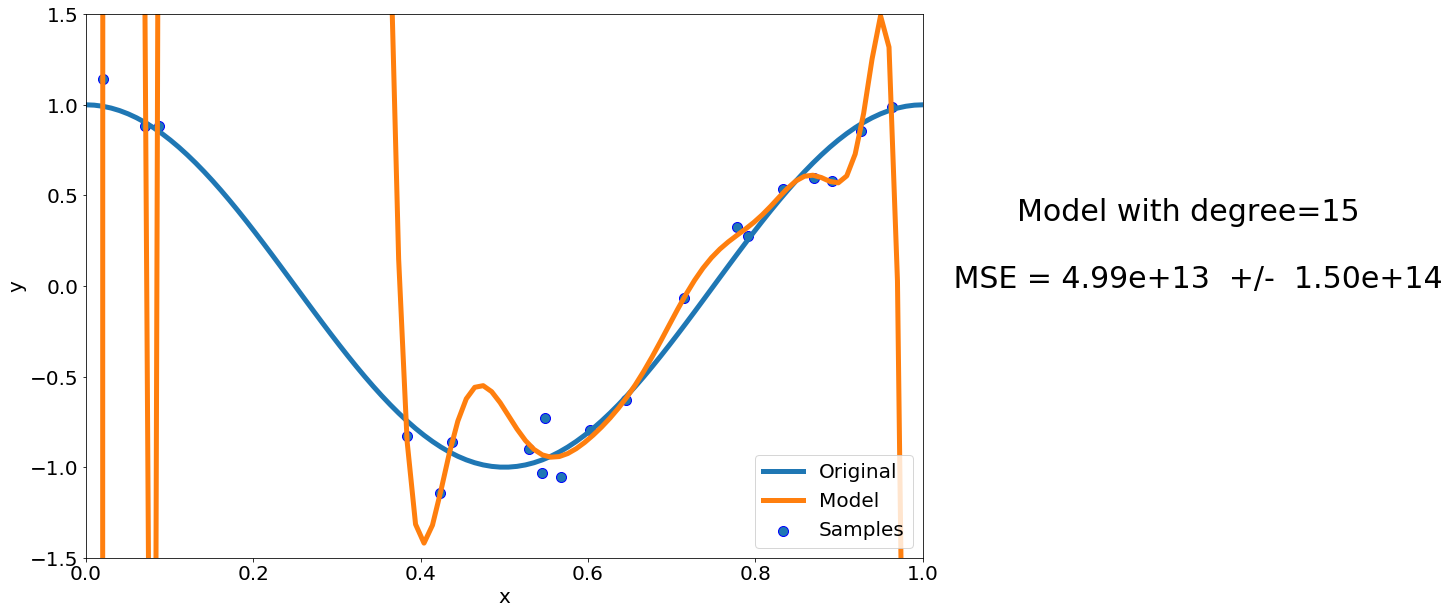

In [15]:
solve(15)

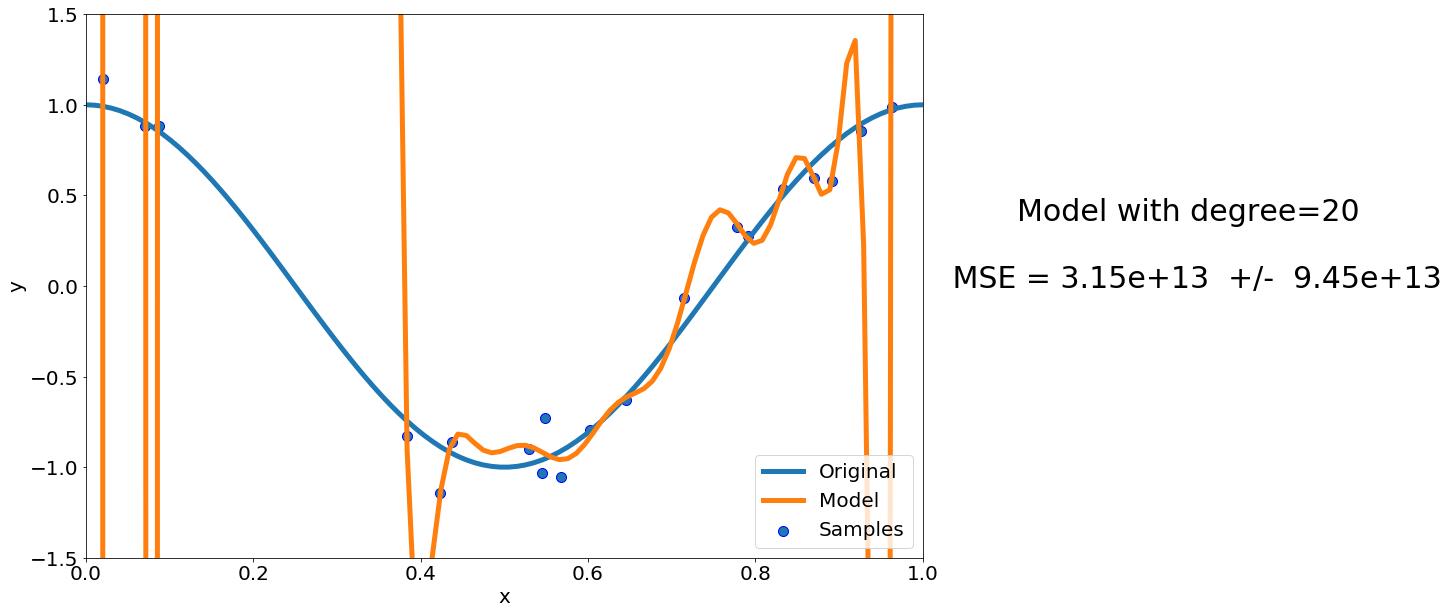

In [16]:
solve(20)